a  a    1.000000
   b    0.012031
   c   -0.007585
   d   -0.064696
b  a    0.012031
   b    1.000000
   c   -0.061976
   d   -0.172434
c  a   -0.007585
   b   -0.061976
   c    1.000000
   d    0.017738
d  a   -0.064696
   b   -0.172434
   c    0.017738
   d    1.000000
dtype: float64


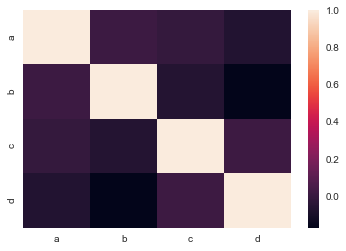

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

data = np.random.rand(100,4)

df = pd.DataFrame(data)
df.columns = list('abcd')

corrMatrix = df.corr()



print corrMatrix.unstack()

sns.heatmap(corrMatrix)

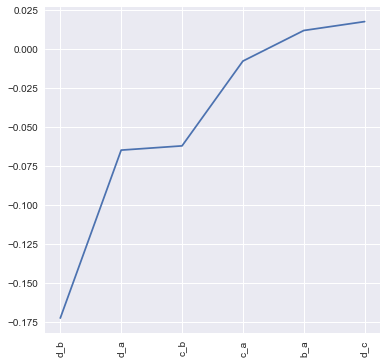

In [2]:
no_dups = corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool)).unstack().sort_values().dropna()

# print no_dups

xlabels = ['_'.join(x) for x in no_dups.index.values]


no_dups.plot(figsize=(6,6))
plt.xticks(range(len(xlabels)),xlabels, rotation=90)
plt.show()

In [3]:
print corrMatrix.unstack()[0]

1.0


In [4]:
print corrMatrix.unstack()[['a','b']]

a  a    1.000000
   b    0.012031
   c   -0.007585
   d   -0.064696
b  a    0.012031
   b    1.000000
   c   -0.061976
   d   -0.172434
dtype: float64


In [5]:
print corrMatrix.unstack()['a','b']

0.0120314472710383


In [6]:
print corrMatrix.unstack().index.values

[('a', 'a') ('a', 'b') ('a', 'c') ('a', 'd') ('b', 'a') ('b', 'b')
 ('b', 'c') ('b', 'd') ('c', 'a') ('c', 'b') ('c', 'c') ('c', 'd')
 ('d', 'a') ('d', 'b') ('d', 'c') ('d', 'd')]


In [7]:
print corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))

    a         b         c         d
a NaN  0.012031 -0.007585 -0.064696
b NaN       NaN -0.061976 -0.172434
c NaN       NaN       NaN  0.017738
d NaN       NaN       NaN       NaN


In [8]:
no_dups = corrMatrix.mask(np.tril(np.ones(corrMatrix.shape)).astype(np.bool)).unstack().dropna()

no_dups

b  a    0.012031
c  a   -0.007585
   b   -0.061976
d  a   -0.064696
   b   -0.172434
   c    0.017738
dtype: float64

In [9]:
print no_dups

b  a    0.012031
c  a   -0.007585
   b   -0.061976
d  a   -0.064696
   b   -0.172434
   c    0.017738
dtype: float64


In [10]:
bins = pd.cut(no_dups, bins=10)

bins

b  a     (-0.00128, 0.0177]
c  a    (-0.0203, -0.00128]
   b     (-0.0773, -0.0583]
d  a     (-0.0773, -0.0583]
   b       (-0.173, -0.153]
   c     (-0.00128, 0.0177]
dtype: category
Categories (10, interval[float64]): [(-0.173, -0.153] < (-0.153, -0.134] < (-0.134, -0.115] < (-0.115, -0.0964] ... (-0.0583, -0.0393] < (-0.0393, -0.0203] < (-0.0203, -0.00128] < (-0.00128, 0.0177]]

In [11]:
no_dups

b  a    0.012031
c  a   -0.007585
   b   -0.061976
d  a   -0.064696
   b   -0.172434
   c    0.017738
dtype: float64

In [12]:
df = pd.DataFrame([no_dups,bins]).T
df.columns = ['correlation','bin']

df

correlation                  bin
b a   0.0120314   (-0.00128, 0.0177]
c a -0.00758495  (-0.0203, -0.00128]
  b  -0.0619763   (-0.0773, -0.0583]
d a  -0.0646957   (-0.0773, -0.0583]
  b   -0.172434     (-0.173, -0.153]
  c   0.0177383   (-0.00128, 0.0177]

In [13]:
df.sort_values('correlation')

correlation                  bin
d b   -0.172434     (-0.173, -0.153]
  a  -0.0646957   (-0.0773, -0.0583]
c b  -0.0619763   (-0.0773, -0.0583]
  a -0.00758495  (-0.0203, -0.00128]
b a   0.0120314   (-0.00128, 0.0177]
d c   0.0177383   (-0.00128, 0.0177]

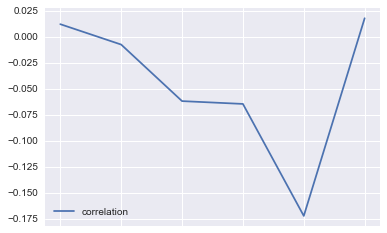

In [14]:
df.plot()